In [ ]:
!gdown https://drive.google.com/drive/folders/1UdTuRdRATnVSN1eXEKs3NCQpoZEggDm1?usp=share_link

/usr/local/lib/python3.8/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/drive/folders/1UdTuRdRATnVSN1eXEKs3NCQpoZEggDm1?usp=share_link
To: /content/1UdTuRdRATnVSN1eXEKs3NCQpoZEggDm1?usp=share_link
937kB [00:00, 54.0MB/s]


In [ ]:
!pip install bagpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 KB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.4/100.4 KB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 KB 12.1 MB/s eta 0:00:00
  Created wheel for gnupg: filename=gnupg-2.3.1-py3-none-any.whl size=94624 sha256=4b8d75bd56d2ef23a6e0dab0df9c8690966b82f0047246c7a275cd92ec69bf34
  Stored in directory: /root/.cache/pip/wheels/26/3f/50/9d97272d89c993d4

In [ ]:
import bagpy
directory = "/content/drive/MyDrive/d435i_sample_data/d435i_walking.bag"
bag = bagpy.bagreader(directory)

[INFO]  Data folder /content/drive/MyDrive/d435i_sample_data/d435i_walking already exists. Not creating.


In [ ]:
bag.topic_table

,Topics,Types,Message Count,Frequency
0,/device_0/info,diagnostic_msgs/KeyValue,9,NaN
1,/device_0/sensor_0/Depth_0/image/data,sensor_msgs/Image,261,30.00861
2,/device_0/sensor_0/Depth_0/image/metadata,diagnostic_msgs/KeyValue,4698,NaN
3,/device_0/sensor_0/Depth_0/info,realsense_msgs/StreamInfo,1,NaN
4,/device_0/sensor_0/Depth_0/info/camera_info,sensor_msgs/CameraInfo,1,NaN
...,...,...,...,...
78,/device_0/sensor_2/Gyro_0/info,realsense_msgs/StreamInfo,1,NaN
79,/device_0/sensor_2/info,diagnostic_msgs/KeyValue,1,NaN
80,/device_0/sensor_2/option/Frames Queue Size/de...,std_msgs/String,1,NaN
81,/device_0/sensor_2/option/Frames Queue Size/value,std_msgs/Float32,1,NaN


In [ ]:
acc = bag.message_by_topic('/device_0/sensor_2/Accel_0/imu/data')
gyro = bag.message_by_topic('/device_0/sensor_2/Gyro_0/imu/data')
depth = bag.message_by_topic('/device_0/sensor_0/Depth_0/image/data')
color = bag.message_by_topic('/device_0/sensor_1/Color_0/image/data')

In [ ]:
print(acc)
print(gyro)
print(depth)
print(color)

/content/drive/MyDrive/d435i_sample_data/d435i_walking/device_0-sensor_2-Accel_0-imu-data.csv
/content/drive/MyDrive/d435i_sample_data/d435i_walking/device_0-sensor_2-Gyro_0-imu-data.csv
/content/drive/MyDrive/d435i_sample_data/d435i_walking/device_0-sensor_0-Depth_0-image-data.csv
/content/drive/MyDrive/d435i_sample_data/d435i_walking/device_0-sensor_1-Color_0-image-data.csv


In [ ]:
import pandas as pd

data_acc = pd.read_csv(acc)
data_gyro = pd.read_csv(gyro)
data_depth = pd.read_csv(depth)
data_color = pd.read_csv(color)


In [ ]:
print(data_color)

         Time  header.seq  header.stamp.secs  header.stamp.nsecs  \
0    0.015277        1751                149           549776000   
1    0.049476        1752                149           583136000   
2    0.083570        1753                149           616496000   
3    0.115818        1754                149           649856000   
4    0.148959        1755                149           683216000   
..        ...         ...                ...                 ...   
255  8.521466        2006                158            56576000   
256  8.554681        2007                158            89936000   
257  8.588131        2008                158           123296000   
258  8.621360        2009                158           156656000   
259  8.654791        2010                158           190016000   

     header.frame_id  height  width encoding  is_bigendian  step  \
0                  0     480    640     rgb8             0  1920   
1                  0     480    640     rgb8   

<ipython-input-17-29904e5c7364>:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  nparr = np.fromstring(byte_string, np.uint8)


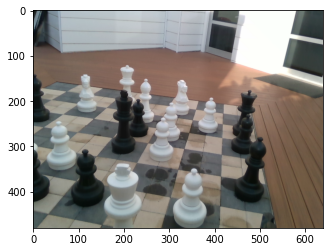

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

raw_string = data_color['data'][0]
byte_string = raw_string[2:-1].encode('latin1')
escaped_string = byte_string.decode('unicode_escape')
byte_string = escaped_string.encode('latin1')
nparr = np.fromstring(byte_string, np.uint8)
rgb = nparr.reshape((480, 640, -1))
plt.imshow(rgb)

In [ ]:
print(data_depth)

             Time  header.seq  header.stamp.secs  header.stamp.nsecs  \
0    1.000000e-09        1502                149           549753000   
1    3.373967e-02        1503                149           583113000   
2    6.605180e-02        1504                149           616473000   
3    9.975399e-02        1505                149           649833000   
4    1.337944e-01        1506                149           683193000   
..            ...         ...                ...                 ...   
256  8.539380e+00        1758                158            89913000   
257  8.571654e+00        1759                158           123273000   
258  8.605056e+00        1760                158           156633000   
259  8.638264e+00        1761                158           189993000   
260  8.672448e+00        1762                158           223353000   

     header.frame_id  height  width encoding  is_bigendian  step  \
0                  0     720   1280   mono16             0  2560   

(921600,)
(720, 1280)


<ipython-input-37-c6bda9117feb>:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  nparr2 = np.fromstring(byte_string2, np.uint16)


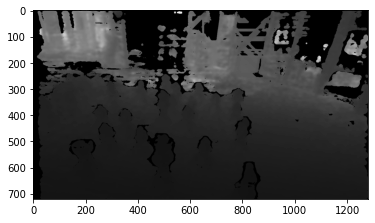

In [ ]:
raw_string2 = data_depth['data'][0]
byte_string2 = raw_string2[2:-1].encode('latin1')
escaped_string2 = byte_string2.decode('unicode_escape')
byte_string2 = escaped_string2.encode('latin1')
nparr2 = np.fromstring(byte_string2, np.uint16)
print(nparr2.shape)
dep = nparr2.reshape((720, 1280))
#dep = dep[:,:,0]
print(dep.shape)
plt.imshow(dep, cmap='gray')
#plt.imshow(dep)

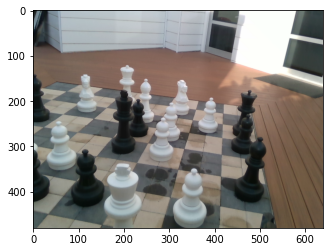

In [ ]:
plt.imshow(rgb)

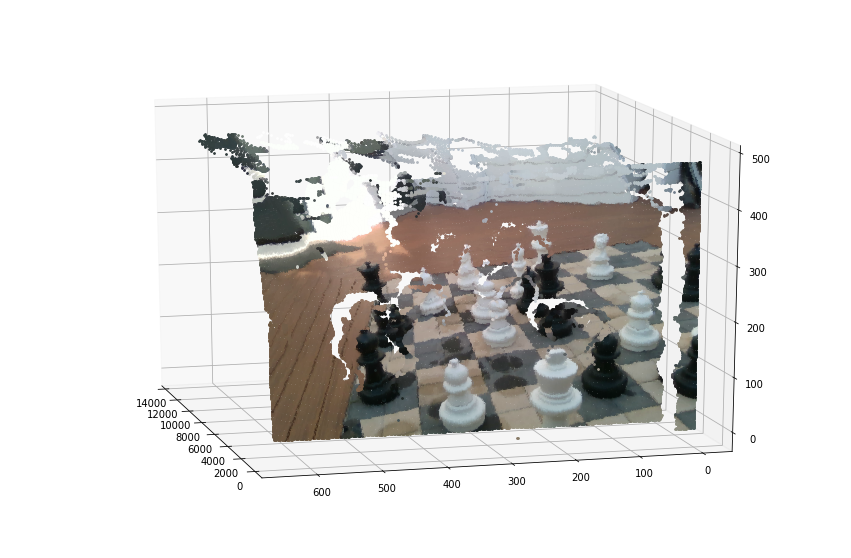

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
dep = np.flipud(dep)
rgb = np.flipud(rgb)
STEP = 2
for x in range(0, rgb.shape[0], STEP):
    for y in range(0, rgb.shape[1], STEP):
        ax.scatter(
            dep[x,y], y, x,
            c=[tuple(rgb[x, y, :3]/255)], s=3)
    ax.view_init(15, 165)

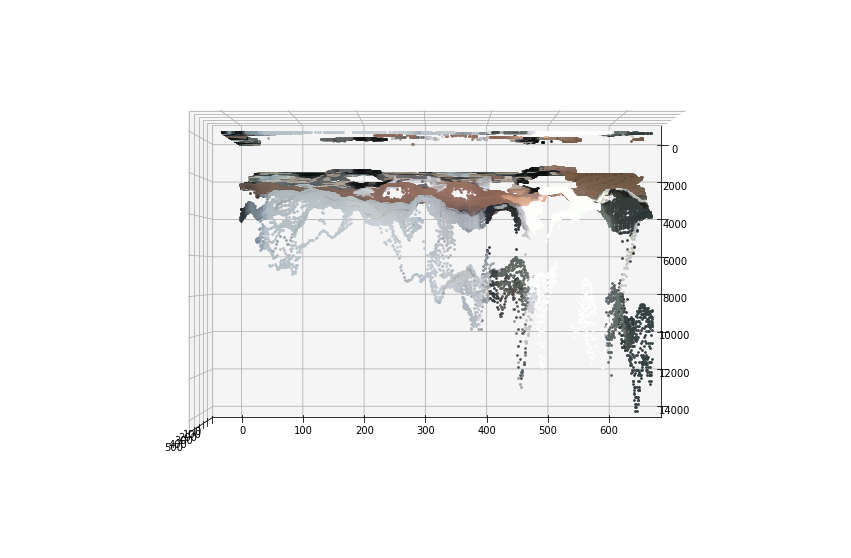

In [ ]:
ax.view_init(90, 0)
fig

In [ ]:
print(data_gyro)

         Time  header.seq  header.stamp.secs  header.stamp.nsecs  \
0    0.000207       23058                149           599549000   
1    0.039180       23073                149           636991000   
2    0.101104       23099                149           701889000   
3    0.103414       23100                149           704385000   
4    0.135902       23113                149           736834000   
..        ...         ...                ...                 ...   
588  8.678255       26531                158           271003000   
589  8.678854       26532                158           273500000   
590  8.679464       26533                158           275996000   
591  8.684887       26537                158           285980000   
592  8.687049       26538                158           288476000   

     header.frame_id  orientation.x  orientation.y  orientation.z  \
0                  0            0.0            0.0            0.0   
1                  0            0.0          

In [ ]:
print(data_acc)

         Time  header.seq  header.stamp.secs  header.stamp.nsecs  \
0    0.000674       28849                149           600178000   
1    0.035088       28867                149           636077000   
2    0.083035       28891                149           683940000   
3    0.084922       28892                149           685934000   
4    0.102767       28901                149           703882000   
..        ...         ...                ...                 ...   
669  8.673340       33192                158           262728000   
670  8.674778       33193                158           264722000   
671  8.676055       33194                158           266717000   
672  8.678518       33195                158           268712000   
673  8.679085       33196                158           270706000   

     header.frame_id  orientation.x  orientation.y  orientation.z  \
0                  0            0.0            0.0            0.0   
1                  0            0.0          

In [ ]:
x = data_acc['linear_acceleration.x'][0]
y = data_acc['linear_acceleration.y'][0]
z = data_acc['linear_acceleration.z'][0]
zgyro = data_gyro['linear_acceleration.z'][0]
print(x)
print(y)
print(z)
print(zgyro-z)

5.325011253356934
-71.53951263427734
-28.096052169799805
28.096052169799805
